<a href="https://colab.research.google.com/github/YuvrajShivtare/doc2vec/blob/main/doc2vec_dataclean_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
WordNet_Lemmatizer = WordNetLemmatizer()

In [ ]:
depression = pd.read_csv(r'drive/My Drive/Big_data/depression_posts.csv')
anxiety = pd.read_csv(r'drive/My Drive/Big_data/anxiety_posts.csv')
ptsd = pd.read_csv(r'drive/My Drive/Big_data/ptsd_posts.csv')
casual = pd.read_csv(r'drive/My Drive/Big_data/casual_conversation_posts.csv')

In [ ]:
!pip install texthero

In [ ]:
import texthero as hero

In [ ]:
def cleandf(df):
    df.fillna(' ',inplace = True)
    df = df[(df['Title']!='[deleted]')]
    df = df[(df['Title']!='[removed]')]
    df = df[(df['Body']!='[deleted]')]
    df = df[(df['Body']!='[removed]')]
    df['text'] = df['Title']+" "+ df['Body']
    df['text'] = df['text'].pipe(hero.clean).pipe(hero.remove_punctuation).pipe(hero.remove_urls)
    df = df[df["text"].str.split().map(len) > 5]
    df = df[df["text"].str.split().map(len) < 100]
    df['length'] = df['text'].str.split().map(len)
    df = df.iloc[-10001:-1,:]
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [ ]:
depression_df  = cleandf(depression)
anxiety_df = cleandf(anxiety)
ptsd_df = cleandf(ptsd)
casual_df = cleandf(casual)

In [ ]:
print("No. of elements in depression: ",len(depression_df))
print("No. of elements in anxiety: ",len(anxiety_df))
print("No. of elements in PTSD: ",len(ptsd_df))
print("No. of elements in Casual Conversation: ",len(casual_df))

No. of elements in depression:  10000
No. of elements in anxiety:  10000
No. of elements in PTSD:  10000
No. of elements in Casual Conversation:  10000


In [ ]:
test_df = pd.concat([depression_df['text'][-2001:-1],anxiety_df['text'][-2001:-1],ptsd_df['text'][-2001:-1],casual_df['text'][-2001:-1]], keys=[0,1,2,3]).reset_index()
train_df = pd.concat([depression_df['text'][0:8000],anxiety_df['text'][0:8000],ptsd_df['text'][0:8000],casual_df['text'][0:8000]], keys=[0,1,2,3]).reset_index()

In [ ]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
train_df

,level_0,level_1,text
0,0,3027,miss friends even shitty friends cut made feel...
1,3,6708,dad habits never change growing remember anyti...
2,3,843,texting back really nice friend met bus stop s...
3,1,5776,suffer anxiety effective technique found ancie...
4,0,1976,one hates whole depression chemical imbalance...
...,...,...,...
31995,1,7132,get rid constant stomachache go outside
31996,0,6817,weight depression get bed group therapy today ...
31997,2,4647,traumatic experience know cope im mountaineer ...
31998,2,7191,anything help someone ptsd new year celebratio...


In [ ]:
X_train_word_split = [word.split() for word in train_df['text']]
X_test_word_split = [word.split() for word in test_df['text']]

# Doc2Vec Model Training:

In [ ]:
import gensim
import gensim.downloader as api
# dataset = api.load("text8")
data = [d for d in X_train_word_split]
def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
          yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
data_for_training = list(tagged_document(data))
#print(data_for_training[:1])
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=5, window = 5, max_vocab_size = None,epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)
print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))

[-0.01675561 -0.08571181 -0.31949607  0.06631324 -0.05074192 -0.07367566
  0.16591878 -0.00929664  0.04260327 -0.05689652 -0.02240389  0.2379508
  0.17768851  0.01632254  0.05845846 -0.12835376  0.08971245 -0.28490406
 -0.36578357 -0.2195239  -0.20166819 -0.3769394  -0.19715327  0.20952354
 -0.1139712  -0.07713294  0.06549828  0.06594113 -0.12349322  0.07442006
  0.223854   -0.19214788 -0.02724715 -0.20456757  0.10727073 -0.13338123
 -0.13997266  0.16921176  0.03044934 -0.15224373  0.4624997   0.09626876
 -0.05640387  0.11861145 -0.11585326 -0.11587656 -0.15443043 -0.17929453
 -0.00340758  0.13065138 -0.27824926  0.10253385  0.07782105  0.05272526
  0.3398671  -0.04742077  0.1281318   0.14210226  0.46810466 -0.16183633
 -0.05323454 -0.07174753  0.33341488  0.41147766  0.20830204 -0.14949319
 -0.25130317 -0.09435883  0.14027666  0.03259801  0.22124948  0.02233462
 -0.04967211  0.07045797  0.09404784 -0.170487   -0.38874492  0.15544358
 -0.02480196  0.10757243  0.11808782 -0.20380162 -0.

#### Data Conversion to vectors:

In [ ]:
X_train_vector = [model.docvecs[i] for i in range(0,len(X_train_word_split))]
X_test_vector = [model.infer_vector(i) for i in X_test_word_split]

In [ ]:
X_test_vector = np.array(X_test_vector)
X_train_vector = np.array(X_train_vector)

### Dimension Reduction using LDA:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda_train = lda.fit_transform(X_train_vector, train_df['level_0'])

In [ ]:
X_lda_test = lda.transform(X_test_vector)

# Plot LDA:

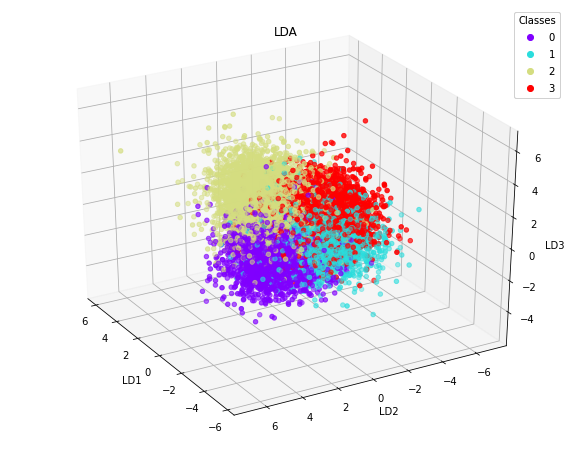

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# %matplotlib notebook
scatter = ax.scatter(X_lda_train[:,0], X_lda_train[:,1],X_lda_train[:,2], c=train_df['level_0'],cmap='rainbow')
num = 65
ax.scatter(X_lda_test[num,0], X_lda_test[num,1],X_lda_test[num,2],c='black',s= 500)

ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.set_zlabel("LD3")
ax.set_title("LDA")
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.view_init(30, 150)

# Outlier removal Code:

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

In [ ]:
def filter(cat):
    l = []
    post = []
    for i,j,z in zip(X_lda_train,train_df['level_0'],train_df['text']):
        if j == cat:
            l.append(i)
            post.append(z)
    cols = [0,1,2]
    # scaleddf = StandardScaler().fit_transform(pd.DataFrame(l).values)
    scaleddf = pd.DataFrame(l)
    post = pd.DataFrame(post)
    # print("lenght of post: ", len(post))
    # print(scaleddf.shape)
    z = np.abs(stats.zscore(scaleddf))
    # print(scaleddf[(z < 1).all(axis=1)])
    # print((z < 1))
    scaleddf = scaleddf[(z < 2).all(axis=1)]
    print("outliers removed for class {} is {}".format(cat, len(l)-len(scaleddf)))
    post = post[post.index.isin(scaleddf.index)]
    # return scaleddf.to_numpy(),post
    return scaleddf,post

In [ ]:
(unique, counts) = np.unique(train_df['level_0'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 8000],
       [   1, 8000],
       [   2, 8000],
       [   3, 8000]])

In [ ]:
dep,dep_post = filter(0)
anx,anx_post = filter(1)
ptsd,ptsd_post = filter(2)
cas,cas_post = filter(3)

outliers removed for class 0 is 1116
outliers removed for class 1 is 1145
outliers removed for class 2 is 1110
outliers removed for class 3 is 1117


In [ ]:
len(dep)+len(anx)+len(ptsd)+len(cas)

27512

In [ ]:
dep

,0,1,2
0,0.017276,0.288529,-0.236773
1,-1.334658,1.339307,-1.190064
3,-1.326322,1.689434,-0.751224
4,0.081049,0.642298,-0.366635
5,-1.080972,-0.128140,-0.477930
...,...,...,...
7994,-1.828953,1.701740,-1.054991
7996,0.669230,1.154310,0.255163
7997,0.165500,2.830175,-1.317120
7998,-1.992685,0.821198,-1.055854


In [ ]:
dep[0]

1      -1.193712
2       0.048236
3      -0.595101
14     -0.880100
16     -0.569531
          ...   
8825   -0.080090
8830   -0.663192
8834   -0.062086
8837   -0.955024
8838   -1.345982
Name: 0, Length: 3710, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



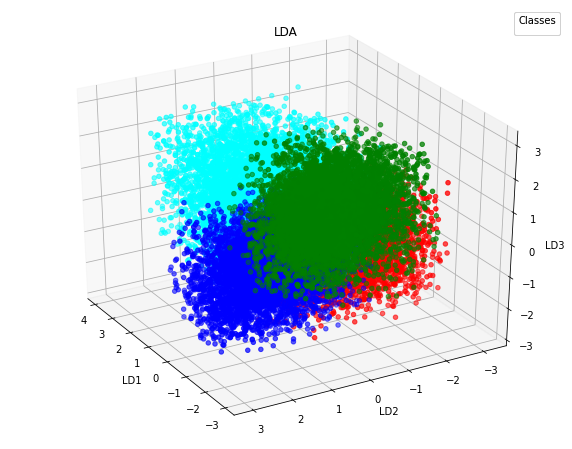

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# %matplotlib notebook
scatter = ax.scatter(dep[0], dep[1],dep[2], c='blue')
# scatter = ax.scatter(dep.values, c='blue')

ax.scatter(anx[0], anx[1],anx[2],c='red')
ax.scatter(ptsd[0], ptsd[1],ptsd[2],c='cyan')
ax.scatter(cas[0], cas[1],cas[2],c='green')

ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.set_zlabel("LD3")
ax.set_title("LDA")
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.view_init(30, 150)
plt.show()

In [ ]:
df = pd.concat([dep,anx,ptsd,cas], keys=[0,1,2,3]).reset_index()

In [ ]:
df

,level_0,level_1,0,1,2
0,0,0,0.017276,0.288529,-0.236773
1,0,1,-1.334658,1.339307,-1.190064
2,0,3,-1.326322,1.689434,-0.751224
3,0,4,0.081049,0.642298,-0.366635
4,0,5,-1.080972,-0.128140,-0.477930
...,...,...,...,...,...
27507,3,7994,-1.095465,-0.492545,1.131417
27508,3,7995,0.472221,-0.446558,1.616411
27509,3,7996,0.072985,0.083731,-0.359387
27510,3,7997,0.000575,0.789024,1.259251


# UMAP:

In [ ]:
!pip install umap-learn[plot]

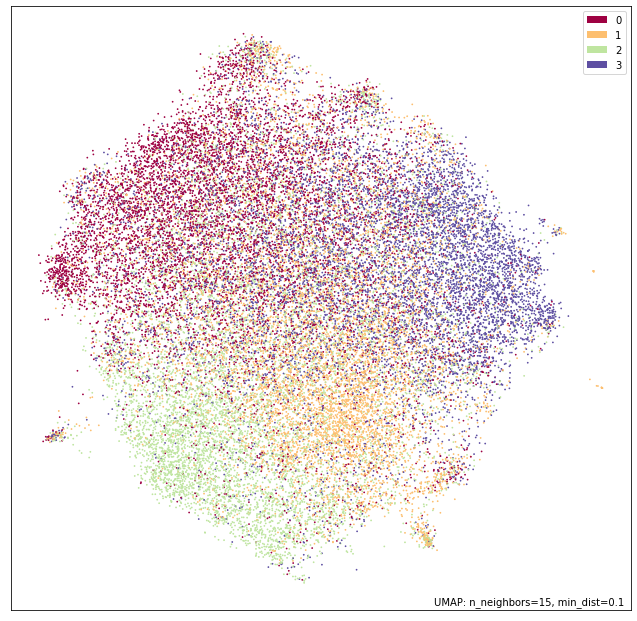

In [ ]:
import umap
import umap.plot
# mapper = umap.UMAP().fit(df[[0,1,2]])
mapper = umap.UMAP().fit(X_train_vector)
# mapper = umap.UMAP().fit(X_reduced)
umap.plot.points(mapper, labels=train_df['level_0'])

In [ ]:
# from sklearn.manifold import TSNE 
# from sklearn import decomposition 
# tsne_model = TSNE(perplexity=30.0, n_components=2, n_iter=2500, random_state=23,init='pca', learning_rate=800.0) 
# new_values = tsne_model.fit_transform(df[[0,1,2]])

In [ ]:
# plt.figure(figsize=(8,8)) 
# plt.scatter(new_values[:,0],new_values[:,1],c=df['level_0'],cmap='rainbow')
# # plt.scatter(new_values[-1,0],new_values[-1,1],c='black',s=1000)

# #plt.savefig(r'C:\Users\16466\Desktop\data\800_Project\report\tsne_test.png')
# plt.show()

# PACMAP:

In [ ]:
df[[0,1,2]].values.shape

(14341, 3)

In [ ]:
pip install pacmap

     |████████████████████████████████| 655kB 28.5MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391638 sha256=892bcb35174a4cb4c1bc8ce84fabae6a3b5ee9b435a1da675738e31d7ae39861
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


In [ ]:
import pacmap
import numpy as np
import matplotlib.pyplot as plt
embedding = pacmap.PaCMAP(n_dims=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
# fit the data (The index of transformed data corresponds to the index of the original data)
# X_transformed = embedding.fit_transform(df[[0,1,2]].values, init="pca")
X_transformed = embedding.fit_transform(X_train_vector, init="pca")

# X_transformed = embedding.fit_transform(X_reduced, init="pca")

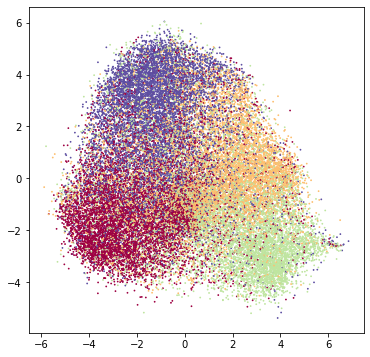

In [ ]:
# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap="Spectral", c=df['level_0'], s=0.6)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap="Spectral", c=train_df['level_0'], s=0.6)

In [ ]:

pip install trimap
#TriMap:

     |████████████████████████████████| 5.6MB 12.2MB/s 
  Created wheel for trimap: filename=trimap-1.0.15-cp37-none-any.whl size=14639 sha256=cfd00e22ab6617cadbb41b743e4cd82428a6e3a14b41830bc618667162ae0431
  Stored in directory: /root/.cache/pip/wheels/d2/3d/cb/48d70083c0816221fb25c0ded2162b55e91d8c0c278442bda1
Successfully built trimap


# TriMap:

In [ ]:
import trimap
from sklearn.datasets import load_digits
digits = load_digits()

embedding = trimap.TRIMAP(n_iters=600).fit_transform(df[[0,1,2]].values)
# embedding = trimap.TRIMAP(n_iters=800).fit_transform(X_reduced)

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=600, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 14341 points with dimension 3
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 5111.244, Violated triplets: 0.6480
Iteration:  200, Loss: 4069.977, Violated triplets: 0.5160
Iteration:  300, Loss: 3730.966, Violated triplets: 0.4730
Iteration:  400, Loss: 3537.401, Violated triplets: 0.4485
Iteration:  500, Loss: 3480.180, Violated triplets: 0.4412
Iteration:  600, Loss: 3464.830, Violated triplets: 0.4393
Elapsed time: 0:00:16.436215


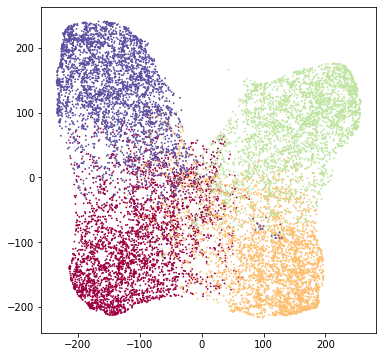

In [ ]:
# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(embedding[:, 0], embedding[:, 1],cmap="Spectral", c=df['level_0'], s=0.6)

#PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
X_reduced = pca.fit_transform(df[[0,1,2]])
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="Spectral", c=df['level_0'], s=0.6)

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1],X_reduced[:,2], cmap="Spectral", c=df['level_0'])
ax.scatter(test[0,0],test[0,1],test[0,2],c='black',s= 500)
ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.set_zlabel("LD3")
ax.set_title("LDA")
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.view_init(30, 150)
plt.show()

In [ ]:
test[0]

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# %matplotlib notebook
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],X_reduced[:,2], cmap="Spectral", c=df['level_0'])

In [ ]:
len(df)

In [ ]:
X+test

In [ ]:
#pca plot:

In [ ]:
X_reduced.shape

In [ ]:
df[[0,1,2]].shape

In [ ]:
X_lda_test[0].reshape(1,-1)

In [ ]:
test = pca.transform(X_lda_test[0].reshape(1,-1))

In [ ]:
X_lda_test.shape

In [ ]:
y_test.shape

In [ ]:
plt.show()

In [ ]:
import pickle
pickle.dump(X_reduced, open( "save.p", "wb" ))

In [ ]:
pickle.dump(df['level_0'].values, open( "lable.p", "wb" ))

In [ ]:
X_lda_test[-3500:-1,:].shape

In [ ]:
y_test[-3500:-1,].shape

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['level_0'], test_size=0.2)

In [ ]:
num = 1000

In [ ]:
X_lda_test1 = pca.transform(X_lda_test[-num:-1,:])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = X_reduced,X_lda_test1,df['level_0'],y_test[-num:-1,]

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1],X_reduced[:,2], cmap="Spectral", c=df['level_0'])
scatter = ax.scatter(X_lda_test[-num:-1,0],X_lda_test[-num:-1,1],X_lda_test[-num:-1,2],c=y_test[-num:-1,])
ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.set_zlabel("LD3")
ax.set_title("LDA")
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.view_init(30, 150)
plt.show()

#### KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4,weights='uniform')
neigh = neigh.fit(X_train1, y_train1)
y_neigh = neigh.predict(X_test1)
# neigh.predict_proba(X_lda_test)

In [ ]:
neigh.predict_proba(X_test1[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test1, y_neigh))

#### Decision Tree:

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train1, y_train1)

In [ ]:
y_tree= clf.predict(X_test1)

In [ ]:
clf.predict_proba(X_test1[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test1, y_tree))

#### SVC:

In [ ]:
from sklearn.svm import SVC   
clf = SVC(kernel='linear')  
clf = clf.fit(X_train1, y_train1)

In [ ]:
y_tree= clf.predict(X_test1)

clf.predict_proba(X_lda_test[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test1, y_tree))

#### Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train1, y_train1)
y_gauss = gnb.predict(X_test1)

In [ ]:
gnb.predict_proba(X_test1[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test1, y_gauss))

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# get models
# get a voting ensemble of models
# define the base models
models = list()

neigh = Pipeline([('m', KNeighborsClassifier(n_neighbors=4,weights='uniform'))])
models.append(('knn', neigh))

gnb = Pipeline([('m', GaussianNB())])
models.append(('gnb', gnb))

svc = Pipeline([('m', SVC(kernel='linear'))])
models.append(('svc', svc))

# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')

In [ ]:
ensemble = ensemble.fit(X_train1, y_train1)

In [ ]:
y_ensemble = ensemble.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test1, y_ensemble))

In [ ]:
models

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ensemble,X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1,verbose = 1 )

In [ ]:
n_scores

In [ ]:
n_scores.mean()

# DL classification:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
t1 = Tokenizer()
t1.fit_on_texts(train_data[0])
encoded_docs = t1.texts_to_sequences(train_data[0])

In [ ]:
X_test_tokenized = t1.texts_to_sequences(X_test)

In [ ]:
# Vocab size
vocab_size1 = len(t1.word_index) + 1
vocab_size1

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix1 = np.zeros((vocab_size1, 100))
for word, i in t1.word_index.items():
    embedding_vector = model1[word]
    if embedding_vector is not None:
        embedding_matrix1[i] = embedding_vector

In [ ]:
vocab_size1

In [ ]:
embedding_matrix1.shape

In [ ]:
len(encoded_docs)

In [ ]:
# Max Length of the sentence in the corpus
maxLength = max(map(len, encoded_docs))
maxLength

In [ ]:
#Padding the sequence with the maxLength Sequence to make sure input size remains same.
padded_docs = pad_sequences(encoded_docs, maxlen=maxLength, padding='post')
X_test = pad_sequences(X_test_tokenized, maxlen=maxLength, padding='post')
print(padded_docs)
print("padded_docs.shape =",padded_docs.shape)

In [ ]:
padded_docs[-1]

In [ ]:
print("X_train.shape = ", padded_docs.shape)
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ",y_test.shape)

In [ ]:
X_test[:3000].shape

In [ ]:
y_test[:3000].shape

In [ ]:
from keras.layers import MaxPooling2D, Activation, Conv2D, Input, MaxPooling1D, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D,BatchNormalization,LSTM, Embedding, Activation
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [ ]:
#(2) the last hidden state as the context vector  for prediction.
embedding_layer = Embedding(vocab_size1, 100, weights=[embedding_matrix1], input_length=maxLength,trainable=False)
inputs = Input(shape=(maxLength,), dtype='int32')
x = embedding_layer(inputs)
x = LSTM(150,return_sequences=True, return_state=False)(x)
x = MaxPooling1D()(x)
x = Flatten()(x)
x = Dense(256,activation='relu')(x)
#dropout = Dropout(0.2)(flatten)
output = Dense(4,activation='softmax')(x)

LSTM_model = Model(inputs=inputs, outputs=output)
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
LSTM_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
LSTM_model.fit(padded_docs, y_train, epochs=20, verbose=1,validation_data=(X_test[:3000],y_test[:3000]))

In [ ]:
from sklearn.metrics import classification_report

y_pred = LSTM_model.predict(X_test)
y_pred = y_pred>0.5
print(classification_report(y_test, y_pred, zero_division = 1))

In [ ]:
from keras.layers import GRU

In [ ]:
#(2) the last hidden state as the context vector for prediction.
embedding_layer = Embedding(vocab_size1, 100, weights=[embedding_matrix1], input_length=maxLength,trainable=False)
inputs = Input(shape=(maxLength,), dtype='int32')
x = embedding_layer(inputs)
whole_sequence_output, final_state  = GRU(150,return_sequences=True, return_state=True)(x)
x = MaxPooling1D()(whole_sequence_output)
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
# X = Dense(128,activation='relu')(X)
x = Dropout(0.2)(x)
output = Dense(4,activation='softmax')(x)

GRU_model = Model(inputs=inputs, outputs=output)
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
GRU_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
GRU_model.fit(padded_docs, y_train, epochs=20, verbose=1,validation_data=(X_test[:2000],y_test[:2000]))

In [ ]:
GRU_model.summary()

In [ ]:
from sklearn.metrics import classification_report

y_pred = GRU_model.predict(X_test)
y_pred = y_pred>0.5
target_names = ['depression','anxiety','ptsd','casual conversation']
print(classification_report(y_test, y_pred, zero_division = 1,target_names=target_names))

### TSNE Visualization:

In [ ]:
cleaned_data = np.concatenate((dep,anx,ptsd,cas),axis = 0)

In [ ]:
from sklearn.manifold import TSNE 
from sklearn import decomposition 
tsne_model = TSNE(perplexity=30.0, n_components=2, n_iter=2500, random_state=23,init='pca', learning_rate=800.0) 
new_values = tsne_model.fit_transform(cleaned_data)

In [ ]:
plt.figure(figsize=(8,8)) 
plt.scatter(new_values[:,0],new_values[:,1],c=df[1],cmap='rainbow')
# plt.scatter(new_values[-1,0],new_values[-1,1],c='black',s=1000)

#plt.savefig(r'C:\Users\16466\Desktop\data\800_Project\report\tsne_test.png')
plt.show()

### Visualizing a test sample:

In [ ]:
X = np.append(X_lda,[X_lda_test[65]],axis= 0)

In [ ]:
from sklearn.manifold import TSNE 
from sklearn import decomposition 
tsne_model1 = TSNE(perplexity=35.0, n_components=2, n_iter=2500, random_state=23,init='pca', learning_rate=800.0) 
new_values1 = tsne_model1.fit_transform(X)

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(new_values1[:-1,0],new_values1[:-1,1],c=y_train,cmap='rainbow')
plt.scatter(new_values1[-1,0],new_values1[-1,1],c='black',s=500)
# plt.savefig(r'C:\Users\16466\Desktop\data\800_Project\report\tsne_test.png')
plt.show()

## Classificiation:


In [ ]:
train_data1 = pd.DataFrame(list(zip(dep,np.zeros((len(dep_post)),dtype =int))))
train_data1 = train_data1.append(list(zip(anx,np.ones((len(anx_post)),dtype =int))))
train_data1 = train_data1.append(list(zip(ptsd,np.full((len(ptsd_post)),2,dtype =int))))
train_data1 = train_data1.append(list(zip(cas,np.full((len(cas_post)),3,dtype =int))))
#train_data1 = train_data1.sample(frac=1).reset_index(drop=True)

In [ ]:
cleaned_data

In [ ]:
y_test.shape

In [ ]:
X_lda_test.shape

In [ ]:
cleaned_data.shape

In [ ]:
len(res2)

In [ ]:
import random 

temp = list(zip(cleaned_data, train_data1[1])) 
random.shuffle(temp) 
res1, res2 = zip(*temp) 

In [ ]:
len(y_test[:3000])

#### KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4,weights='uniform')
neigh = neigh.fit(res1, res2)
y_neigh = neigh.predict(X_lda_test[:3000])
# neigh.predict_proba(X_lda_test)

In [ ]:
neigh.predict_proba(X_lda_test[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test[:3000], y_neigh))

#### Decision Tree:

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(res1, res2)

In [ ]:
y_tree= clf.predict(X_lda_test[:3000])

In [ ]:
clf.predict_proba(X_lda_test[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test[:3000], y_tree))

#### SVC:

In [ ]:
from sklearn.svm import SVC   
clf = SVC(kernel='linear')  
clf = clf.fit(res1, res2)

In [ ]:
y_tree= clf.predict(X_lda_test[:3000])

clf.predict_proba(X_lda_test[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test[:3000], y_tree))

#### Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(res1, res2)
y_gauss = gnb.predict(X_lda_test[:5000])

In [ ]:

gnb.predict_proba(X_lda_test[0].reshape(1,-1))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test[:5000], y_gauss))

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# get models
# get a voting ensemble of models
# define the base models
models = list()

neigh = Pipeline([('m', KNeighborsClassifier(n_neighbors=4,weights='uniform'))])
models.append(('knn', neigh))

gnb = Pipeline([('m', GaussianNB())])
models.append(('gnb', gnb))

svc = Pipeline([('m', SVC(kernel='linear'))])
models.append(('svc', svc))

# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')

In [ ]:
ensemble = ensemble.fit(X_lda, y_train)

In [ ]:
y_ensemble = ensemble.predict(X_lda_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test, y_ensemble))

In [ ]:
models

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ensemble,X_lda, y_train, scoring='accuracy', cv=cv, n_jobs=-1,verbose = 1 )

In [ ]:
n_scores

In [ ]:
n_scores.mean()